In [1]:
##Linear regression

In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
print boston.DESCR

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0,0.5,'Number of Houses')

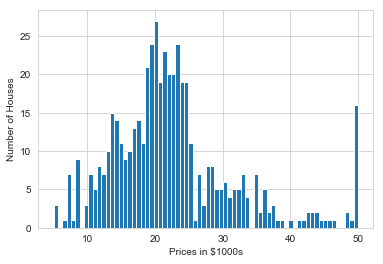

In [7]:
plt.hist(boston.target,bins=70)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

Text(0.5,0,'Number of rooms')

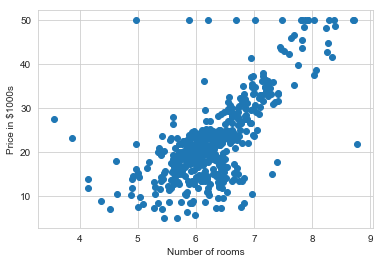

In [8]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [9]:
boston_df = DataFrame(boston.data)


boston_df.columns = boston.feature_names

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [10]:
boston_df['Price'] = boston.target

In [11]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


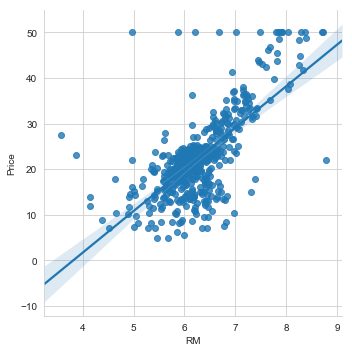

In [12]:
sns.lmplot('RM','Price',data=boston_df)

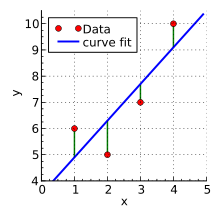

In [13]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

In [14]:
X = boston_df.RM

In [15]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [16]:
X = np.vstack(boston_df.RM)

In [17]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [18]:
X.shape

(506L, 1L)

In [19]:
Y = boston_df.Price

In [20]:
# [X 1]
X = np.array([[value,1] for value in X])

In [21]:
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [22]:
#Matrix made

In [27]:
m , b = np.linalg.lstsq(X,Y,rcond='warn')[0]

## IT WORKS?

C:\Users\DamianAleksanderMiko\Anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


C:\Users\DamianAleksanderMiko\Anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


(9.102108981180315, -34.67062077643858)


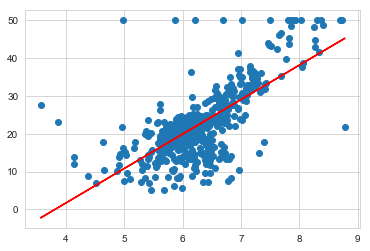

In [26]:
X = boston_df.RM

X=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T

Y = boston_df.Price

m,b = np.linalg.lstsq(X,Y)[0]

print(m, b)

plt.plot(boston_df.RM,boston_df.Price,'o')

x= boston_df.RM

plt.plot(x, m*x + b,'r',label='Best Fit Line')

### OBJAŚNIĆ

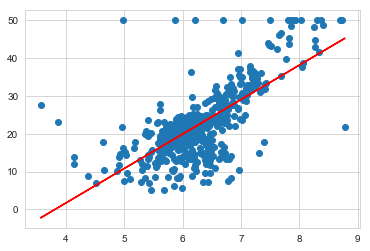

In [28]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x = boston_df.RM

plt.plot(x,m*x+b,'r',label='Best fit line')

In [30]:
results = np.linalg.lstsq(X,Y)

error_total = results[1]

rmse = np.sqrt(error_total/len(x))

print ' The root mean square error was %.2f' %rmse

 The root mean square error was 6.60


C:\Users\DamianAleksanderMiko\Anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [31]:
#Estymator #(przewidywanie)

In [32]:
import sklearn
from sklearn.linear_model import LinearRegression

In [33]:
lreg = LinearRegression()

In [34]:
X_multi = boston_df.drop('Price',1)
# minus Price
Y_target = boston_df.Price

In [35]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
print ' The estimated intercept coefficient is %.2f' %lreg.intercept_
print ' The number of coefficient used was %d' %len(lreg.coef_)

 The estimated intercept coefficient is 36.46
 The number of coefficient used was 13


In [38]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [ ]:
#to są nasze zmienne (współczynniki), z których powstaje równanie

In [42]:
# X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [43]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


In [45]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [47]:
print " Fit a model X_train, and calculate the MSE with Y_train: %.2f" %np.mean((Y_train-pred_train)**2)

 Fit a model X_train, and calculate the MSE with Y_train: 38.32


In [48]:
print " Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f" %np.mean((Y_test-pred_test)**2)

 Fit a model X_train, and calculate MSE with X_test and Y_test: 60.51


In [ ]:
#różnica d między linią dopasowania a wartością dokładną

Text(0.5,1,'Residual plots')

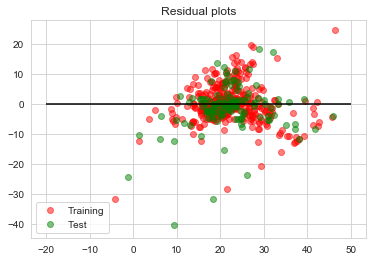

In [55]:
train = plt.scatter(pred_train,(pred_train-Y_train),color='red',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),color='green',alpha=0.5)

plt.hlines(y=0,xmin=-20,xmax=50)

plt.legend((train, test),('Training','Test'),loc='lower left')
plt.title('Residual plots')

In [ ]:
#USEFUL URL
url1 = http://scikit-learn.org/stable/modules/linear_model.html#linear-model
url2 = http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis
url3 = http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html
url4 = http://scikit-learn.org/stable/modules/linear_model.html
url5 = https://en.wikipedia.org/wiki/Coefficient_of_determination
url6 = http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
url7 = https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
url8 = https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
url9 = https://www.youtube.com/watch?v=Qa2APhWjQPc

In [56]:
##It has to be read in reverse order.